# Rellenar datos con Regresion Lineal Simple 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Creamos un data frame 

In [2]:
df = pd.DataFrame({"col_1":[1,4,6,8,14,17,18,20,22], "col_2":[1,4,7,None,11,14,17,None,26]})

In [3]:
df

,col_1,col_2
0,1,1.0
1,4,4.0
2,6,7.0
3,8,NaN
4,14,11.0
5,17,14.0
6,18,17.0
7,20,NaN
8,22,26.0


### Nos fijamos en la columna con datos faltantes

In [4]:
Y = np.array(df["col_2"])

Creamos una lista con los INDICES de los valores faltantes para después poder dividir el DataFrame

In [6]:
in_id = []
for i in np.argwhere(np.isnan(Y)).tolist():
    for j in i:
        in_id.append(j)

In [7]:
in_id

[3, 7]

## Datos de prueba

Con esa lista de INDICES creamos un DataFrame con los puros valores Nulos, ese sería nuestro DataFrame de prueba para poder validar el modelo. En otras palabras donde vamos a rellenar los datos (X_test)

In [8]:
df_NaN = df.iloc[in_id]

In [9]:
X_test = df_NaN.iloc[:,0].values

In [10]:
X_test

array([ 8, 20], dtype=int64)

## Datos de entrenamiento 

Creamos otro DataFrame donde vamos a aplicar el modelo, nuestros datos de entrenamiento. En este caso, los datos no tienen que tener ningun valor nulo. 

In [11]:
df_No_NaN = df[df["col_2"].notna()]

De estos datos de entrenamiento, nos enfocamos en la variable de interés y la variable independiente. 

In [12]:
X_train = df_No_NaN.iloc[:,:-1].values
Y_train = df_No_NaN.iloc[:,-1].values

In [13]:
Y_train

array([ 1.,  4.,  7., 11., 14., 17., 26.])

## Creacion del modelo 

Creamos el modelo de Regresion lineal 

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
regression = LinearRegression()

In [16]:
regression.fit(X_train,Y_train)

LinearRegression()

Predecimos los valores

In [17]:
y_pred = regression.predict(X_test.reshape(-1,1))
y_pred

array([ 7.65233506, 19.85248332])

Creamos una DataFrame copia

In [20]:
df_copy = df_NaN.copy()

### Y rellenamos los valores nulos del DataFrame con los valores que predecimos

In [21]:
df_copy["col_2"] = y_pred

In [22]:
df_copy

,col_1,col_2
3,8,7.652335
7,20,19.852483


Juntamos los dos DataFrames en uno final con los valores ya rellenos 

In [23]:
df_Final = pd.concat([df_No_NaN,df_copy], axis = 0)

In [24]:
df_Final

,col_1,col_2
0,1,1.000000
1,4,4.000000
2,6,7.000000
4,14,11.000000
5,17,14.000000
6,18,17.000000
8,22,26.000000
3,8,7.652335
7,20,19.852483


### Visualizaciones 

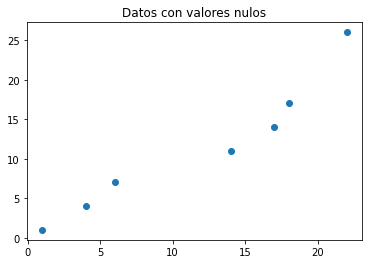

In [26]:
plt.scatter(X_train,Y_train)
plt.title("Datos con valores nulos");

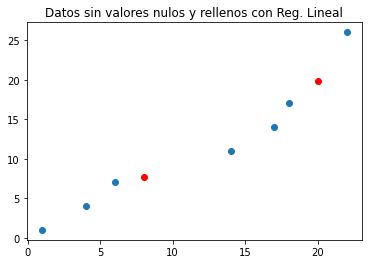

In [36]:
plt.scatter(X_train,Y_train)
plt.scatter(df_copy["col_1"], df_copy["col_2"], color = "red")
plt.title("Datos sin valores nulos y rellenos con Reg. Lineal");